In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math

In [2]:
dataset = pd.read_csv("ipl_data.csv")
dataset.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
X = dataset.iloc[:,[7,8,9,10,11,12,13]].values #Input features
y = dataset.iloc[:, 14].values #Label

In [4]:
X

array([[1.00e+00, 0.00e+00, 1.00e-01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 0.00e+00, 2.00e-01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.00e+00, 0.00e+00, 2.00e-01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [1.28e+02, 7.00e+00, 1.94e+01, ..., 0.00e+00, 4.70e+01, 1.20e+01],
       [1.29e+02, 7.00e+00, 1.95e+01, ..., 0.00e+00, 4.70e+01, 1.30e+01],
       [1.29e+02, 8.00e+00, 1.96e+01, ..., 1.00e+00, 4.70e+01, 1.30e+01]])

In [5]:
y

array([222, 222, 222, ..., 129, 129, 129], dtype=int64)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
y_pred = model.predict(X_test)
y_pred

array([147.31892857, 193.23      , 164.9       , ..., 189.105     ,
       129.29      , 158.42      ])

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# ac = accuracy_score(y_test, y_pred) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
# print(f"Accuracy Score: {ac}")

Mean Absolute Error (MAE): 9.948108930394577
Root Mean Squared Error (RMSE): 15.849467100188503
R² Score: 0.702183603115399


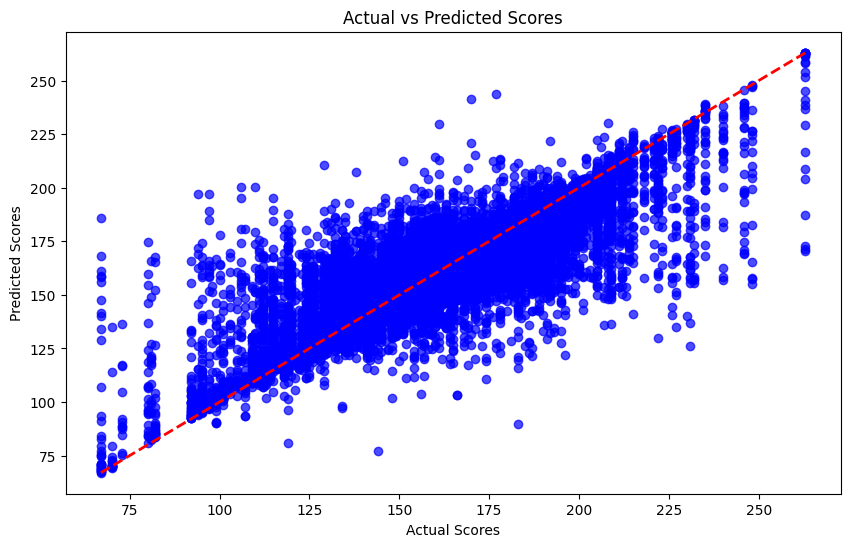

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.show()


In [13]:
def custom_accuracy(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [14]:
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R-squared value:" , score)
print("Custom accuracy:" , custom_accuracy(y_test,y_pred,10))

R-squared value: 52.1344161966197
Custom accuracy: 45.780438071433274


In [33]:

new_prediction = lin.predict(sc.transform(np.array([[80,15,9,17,5,0,0]])))

new_prediction=math.floor(new_prediction)
print("Prediction score:" , new_prediction)

Prediction score: 101


C:\Users\dell\AppData\Local\Temp\ipykernel_436\1043160359.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_prediction=math.floor(new_prediction)
